



```
Giới thiệu về mô hình ARIMA dự đoán chuỗi thời gian.
1. Các thành phần của Chuỗi thời gian là gì? 
Có 4 thành phần:
a) Xu hướng - Chuyển động lên và xuống của dữ liệu theo thời gian trong một khoảng thời gian lớn. Eq: Sự đánh giá cao của đồng đô la so với đồng rupee. 
b) Tính thời vụ - các phương sai theo mùa. Eq: Doanh số bán kem chỉ tăng vào mùa hè 
c) Tiếng ồn hoặc sự không đều - Tăng vọt và chạm đáy ở những khoảng thời gian ngẫu nhiên 
d) Tính chu kỳ - hành vi tự lặp lại sau một khoảng thời gian lớn, như tháng, năm, v.v.
 
2. Stationarity là gì? 
Trước khi áp dụng bất kỳ mô hình thống kê nào trên Chuỗi thời gian, chuỗi này phải cố định, có nghĩa là, trong các khoảng thời gian khác nhau thì:
a) Nó phải có giá trị trung bình không đổi. 
b) Nó phải có phương sai hoặc độ lệch chuẩn không đổi. 
c) Hiệp phương sai tự động không được phụ thuộc vào thời gian. 
Xu hướng & Tính thời vụ là hai lý do khiến Chuỗi thời gian không ổn định và do đó cần được sửa chữa.
 
3. Tại sao Chuỗi thời gian (TS) cần phải dừng? 
a) Nếu một TS có một hành vi cụ thể trong một khoảng thời gian, thì khả năng cao là trong một khoảng thời gian khác, nó sẽ có cùng một hành vi, miễn là TS đứng yên. Điều này giúp dự báo chính xác. 
b) Các lý thuyết & công thức toán học giúp ae thành thục hơn & dễ áp ​​dụng hơn với tư cách là TS đứng yên
 
4. Thử nghiệm để kiểm tra xem chuổi dừng hay không 
Có 2 cách để kiểm tra tính ổn định của TS: 
a) Thống kê cuộn - Vẽ biểu đồ trung bình di chuyển hoặc độ lệch chuẩn di chuyển để xem liệu nó có thay đổi theo thời gian hay không. Đó là một kỹ thuật hình ảnh. 
b) Thử nghiệm ADCF - Thử nghiệm Dickey-Fuller tăng cường được sử dụng để cung cấp cho chúng tôi các giá trị khác nhau có thể giúp xác định tính ổn định. Giả thuyết Null nói rằng TS là không đứng yên. Nó bao gồm Thống kê thử nghiệm và một số giá trị quan trọng đối với một số mức độ tin cậy. Nếu số liệu thống kê Kiểm tra nhỏ hơn các giá trị tới hạn, chúng ta có thể bác bỏ giả thuyết rỗng & nói rằng chuỗi là đứng yên. Kiểm tra ADCF cũng cho chúng ta một giá trị p. Acc với giả thuyết rỗng, các giá trị thấp hơn của p là tốt hơn.
 
8. Mô hình ARIMA là gì? 
ARIMA (Auto Regression Integrated Moving Average) là sự kết hợp của 2 mô hình AR (Auto Regression) & MA (Moving Average). 
Nó có 3 tham số 
- P (độ trễ tự động hồi quy), d (thứ tự phân biệt), Q (trung bình trượt) lần lượt đến từ các thành phần AR, I & MA. Phần AR là mối tương quan giữa khoảng thời gian trước và hiện tại. Để làm giảm nhiễu khi dự đoán, phần MA được sử dụng. Phần I liên kết các phần AR & MA với nhau.
 
Như vậy về tổng quát thì ARIMA là mô hình kết hợp của 2 quá trình tự hồi qui và trung bình trượt. Dữ liệu trong quá khứ sẽ được sử dụng để dự báo dữ liệu trong tương lai. Trước khi huấn luyện mô hình, cần chuyển hóa chuỗi sang chuỗi dừng bằng cách lấy sai phân bậc 1 hoặc logarit. Ngoài ra mô hình cũng cần tuân thủ điều kiện ngặt về sai số không có hiện tượng tự tương quan và phần dư là nhiễu trắng
 ```




In [ ]:
!pip install pmdarima
# https://www.kaggle.com/nageshsingh/stock-market-forecasting-arima/notebook
# https://phamdinhkhanh.github.io/2019/12/12/ARIMAmodel.html#21-l%C3%BD-thuy%E1%BA%BFt-m%C3%B4-h%C3%ACnh-arima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [6]:
stock_data = pd.read_csv("TSLA.csv")
stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


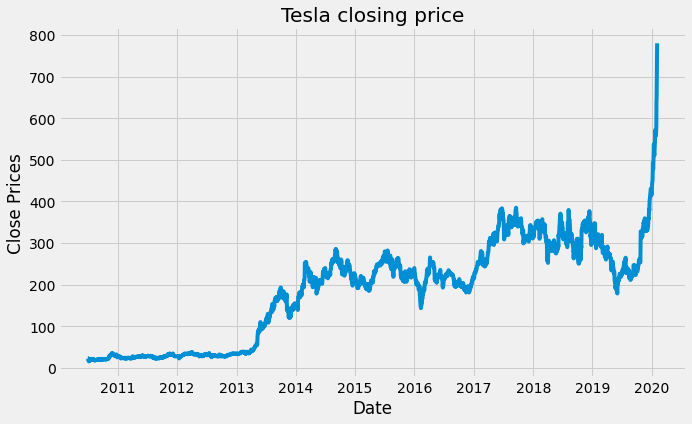

In [7]:
stock_data.index=pd.to_datetime(stock_data['Date'])
stock_data
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Tesla closing price')
plt.show()

In [9]:
df_close=stock_data['Close']

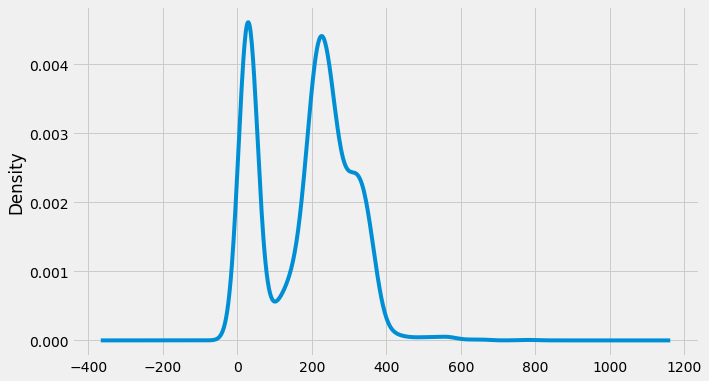

In [10]:
#Distribution of the dataset
stock_data['Close'].plot(kind='kde')



```
Đầu tiên, chúng ta cần kiểm tra xem một chuỗi có đứng yên hay không vì phân tích chuỗi thời gian chỉ hoạt động với dữ liệu tĩnh. Thử nghiệm ADF (Augmented Dickey-Fuller) Bài kiểm tra Dickey-Fuller là một trong những bài kiểm tra thống kê phổ biến nhất. Nó có thể được sử dụng để xác định sự hiện diện của đơn vị gốc trong chuỗi và do đó giúp chúng tôi hiểu liệu chuỗi có đứng yên hay không. Giả thuyết vô hiệu và giả thuyết thay thế của thử nghiệm này là:
Giả thuyết Null: Chuỗi không dừng( cố định) (giá trị của a = 1) 
Giả thuyết thay thế: Chuỗi dừng.
```



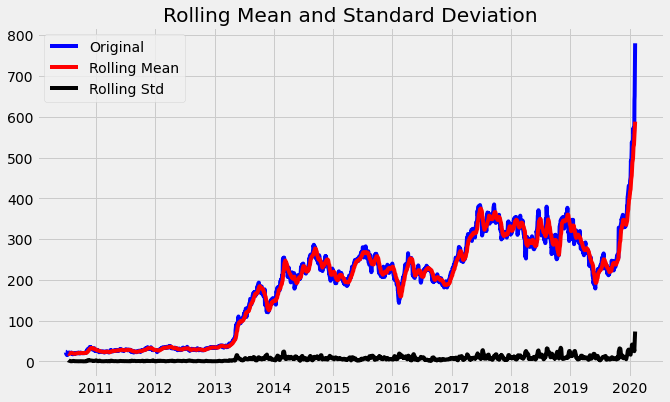

Results of dickey fuller test
Test Statistics                   1.400069
p-value                           0.997114
No. of lags used                 18.000000
Number of observations used    2397.000000
critical value (1%)              -3.433081
critical value (5%)              -2.862747
critical value (10%)             -2.567412
dtype: float64


In [11]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)



```
p_value>0.05 nêu chưa đủ cơ sở bác bỏ H0
-> Chuỗi thời gian non-stationary( không dừng)
Ta cũng có thể quan sát Mean và Phương sai không có định-> chuỗi không dừng.

Để thực hiện phân tích chuỗi thời gian, chúng tôi có thể cần tách tính thời vụ 
và xu hướng khỏi chuỗi của mình. Chuỗi kết quả sẽ trở nên dừng trong quá trình này. 
Vì vậy, chúng ta hãy tách Xu hướng và Tính thời vụ khỏi chuỗi thời gian.
```



<Figure size 720x432 with 0 Axes>

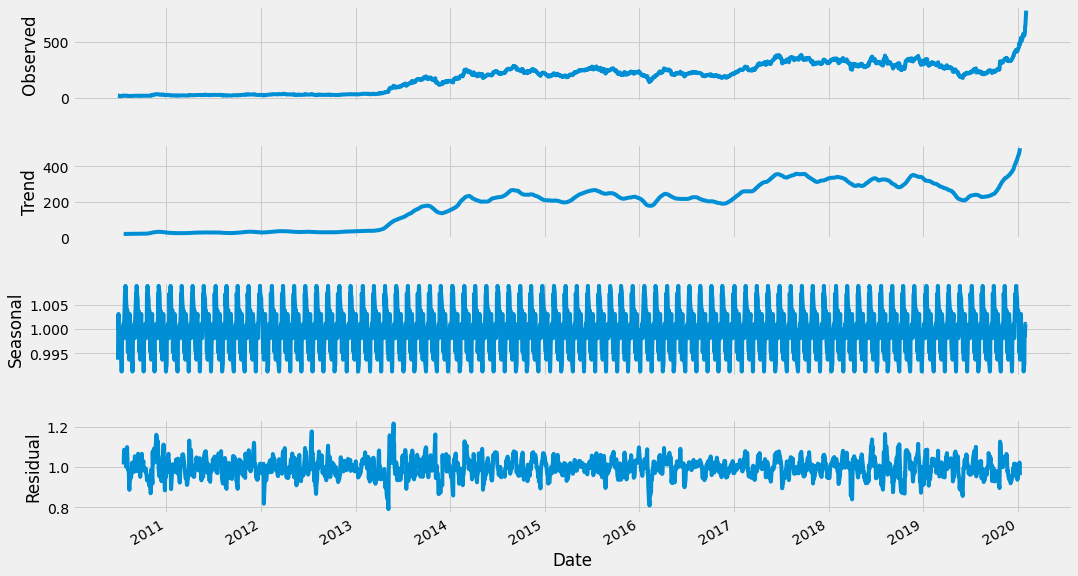

In [12]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)



```
Bắt đầu bằng cách lấy log của chuỗi để giảm độ lớn của các giá trị và giảm xu hướng tăng trong chuỗi. 
Sau đó, sau khi nhận được log của chuỗi, chúng ta tìm thấy giá trị trung bình của chuỗi.
Trung bình luân phiên được tính bằng cách lấy đầu vào trong 12 tháng qua và đưa ra giá trị trung bình tại mọi thời điểm tiếp theo trong chuỗi.```



No handles with labels found to put in legend.


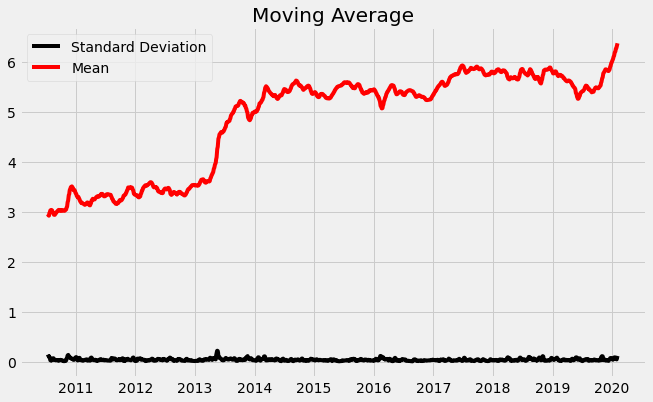

In [13]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

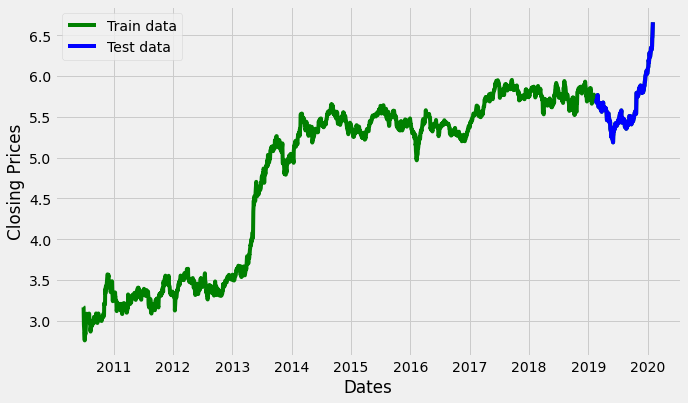

In [14]:
# Bây giờ chúng ta sẽ tạo một mô hình ARIMA và sẽ đào tạo nó với giá close của cổ phiếu trên dữ liệu training.
#  Vì vậy, chúng ta hãy chia dữ liệu thành tập huấn luyện và thử nghiệm và hình dung nó.
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [15]:
print(train_data.shape)
print(test_data.shape)

(2171,)
(242,)


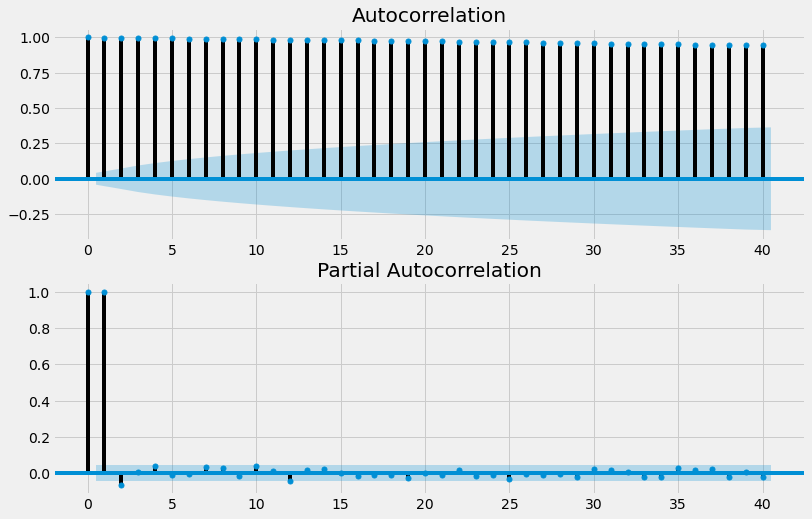

In [16]:
# Chúng ta có thể vẽ biểu đồ các hệ số tự tương quan ACF theo các bậc liên tiếp thông qua hàm plot_acf của statsmodels như bên dưới:
#  giúp tìm ra hệ số q của MV(q)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data, lags=40, ax=ax1)
# Dùng thông qua một biểu đồ PACF về giá trị các hệ số tương quan riêng phần tương ứng với các độ trễ khác nhau,
#  chúng ta sẽ tìm ra được các bậc tự do AR(P) phù hợp
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data, lags=40, ax=ax2)
plt.show()



```
Chọn q=0-5
p=0-2
d=1 vì chuỗi không dừng nên phải thực hiện sai phân để có được chuỗi dừng. thông thường bậc của sai phân là 1.
```



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8739.666, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8738.135, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8738.167, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8738.261, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8737.558, Time=0.90 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.030 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 2171
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4371.833
Date:                Sun, 27 Jun 2021   AIC                          -8739.666
Time:                        13:25:02   BIC                          -8728.301
Sample:                             0   HQIC                         -8735.510
                               - 2171                                  

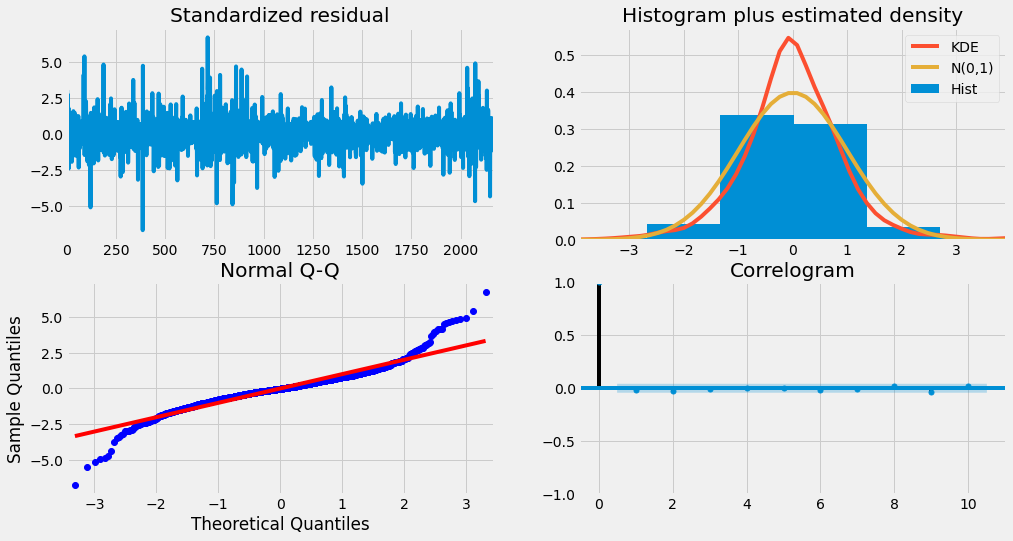

In [18]:
# Đã đến lúc chọn các tham số p, q, d cho mô hình ARIMA. 
# ta có thể chọn giá trị của p, d và q bằng cách quan sát các đồ thị của ACF và PACF 
# nhưng bây giờ chúng tôi sẽ sử dụng Auto ARIMA để có được các tham số tốt nhất mà không cần vẽ đồ thị ACF và PACF.
# Auto ARIMA: Tự động tìm ra bộ tham số p,d,q tối ưu cho mô hình. AIC càng nhỏ thì chất lượng mô hình càng tốt.
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()




```
Best model:  ARIMA(0,1,0) tương ứng với các tham số p(AR), d(I), q(MA)
Nhìn vào sơ đồ thì độ lệch chuẩn phân bố xung quanh giá trị 0, giá trị trung bình cũng cố định.
Trên cùng bên trái: Độ lệch chuẩn dường như dao động xung quanh giá trị trung bình bằng 0 và có phương sai đồng nhất. 
Trên cùng bên phải: Biểu đồ mật độ đề xuất phân phối chuẩn với giá trị trung bình bằng 0. 
Dưới cùng bên trái: Tất cả các dấu chấm phải hoàn toàn trùng với đường màu đỏ. Bất kỳ sai lệch đáng kể nào cũng có nghĩa là phân phối bị lệch.
Dưới cùng bên phải: Biểu đồ báo động, hay còn gọi là, biểu đồ ACF cho thấy các lỗi còn lại không tự động tương quan với nhau. Bất kỳ sự tự tương quan nào cũng ngụ ý rằng có một số mẫu sai số dư không được giải thích trong mô hình. Vì vậy, bạn sẽ cần phải tìm thêm X (yếu tố dự đoán) cho mô hình.

```



In [21]:
# Tiếp theo, tạo một mô hình ARIMA với các tham số tối ưu được cung cấp p, d và q
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2170
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4371.833
Method:                           css   S.D. of innovations              0.032
Date:                Sun, 27 Jun 2021   AIC                          -8739.666
Time:                        13:26:25   BIC                          -8728.301
Sample:                             1   HQIC                         -8735.510
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      1.846      0.065    -7.9e-05       0.003


In [23]:
# Forecast Series

fc, se, conf = fitted.forecast(242, alpha=0.05)  # 95% conf
# print("Forecast Series for test data",fc)

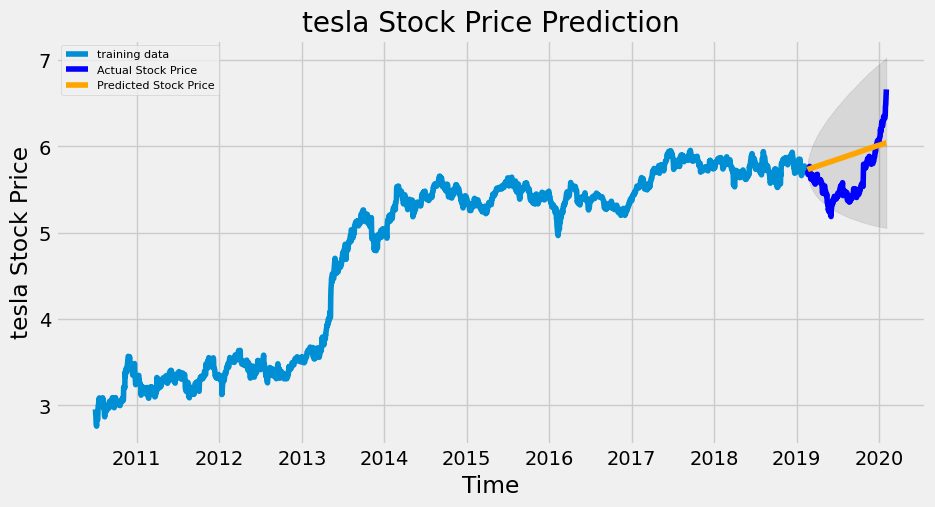

In [24]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('tesla Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.11588186609890254
MAE: 0.29905307605654996
RMSE: 0.34041425660348384
MAPE: 0.054032496748814225




```
Khoảng 5,4% MAPE ngụ ý rằng mô hình chính xác khoảng 94,6% trong việc dự đoán 15 lần quan sát tiếp theo.
MSE (mean square error): Trung bình tổng bình phương sai số.
RMSE (root mean square error): Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế.
MAE (mean absolute error): Trung bình trị tuyệt đối sai số. Chính là khoảng cách theo norm chuẩn bậc 1 giữa giá trị dự báo và giá trị thực tế. Dành cho bạn nếu chưa biết về norm chuẩn bậc 1 hoặc L1 norm.
MAPE (mean absolute percentage error): Trung bình phần trăm trị tuyệt đối sai số. Chỉ số này cho biết giá trị dự báo sai lệch bao nhiêu phần trăm so với giá trị thực tế. Lưu ý ta chỉ tính được chỉ số này chỉ khi giá trị thực tế đều khác 0.
```



In [26]:
Result=stock_data.tail(242)
Result["Predict"]=np.exp(fc)
# Result['Predict'] = np.exp(df['yhat'])
Result

,Date,Open,High,Low,Close,Adj Close,Volume,Predict
Date,,,,,,,,
2019-02-19,2019-02-19,306.559998,311.540009,305.470001,305.640015,305.640015,4168400,308.273946
2019-02-20,2019-02-20,304.410004,306.299988,299.000000,302.559998,302.559998,7142100,308.668390
2019-02-21,2019-02-21,301.809998,303.239990,290.500000,291.230011,291.230011,8909200,309.063340
2019-02-22,2019-02-22,294.489990,296.500000,292.100006,294.709991,294.709991,5740600,309.458795
2019-02-25,2019-02-25,297.910004,302.899994,297.000000,298.769989,298.769989,6626500,309.854755
...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,417.399089
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,417.933162
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,418.467919
